In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

#preparing dataset
df2 = pd.read_csv('surveydata.csv')
ecom = pd.read_csv("ecommercedata.csv")
#for dealing with large dataset - example only
fash = pd.read_csv("picdata.csv")

#get a glimpse of the dataset
df2.head()
#get a glimpse of the dataset
ecom.head()
#get a glimpse of the dataset
fash.head()

#basic descriptive statistics - for checking
#you may do this or not
ecom.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


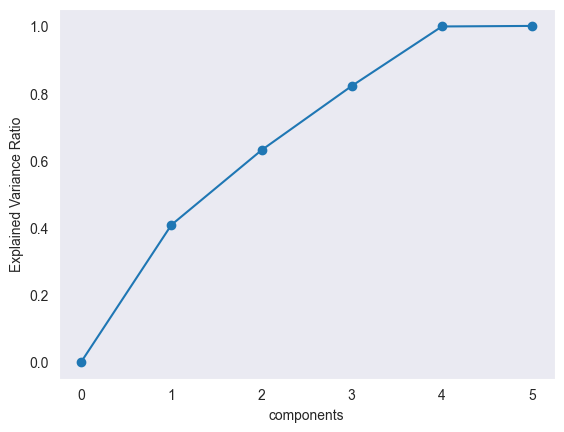

In [26]:
## Principal Component Analysis (PCA)
#starting with ecommerce data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#filter dataset and standardize
ecom = ecom[ecom.columns[3:]]
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom)

#just for starter (can be changed later)
#we get the PCA - with 4 components
#this can change depending on the threshold established at the start of the analysis
#n_components can vary
pca = PCA(n_components=4)
pca.fit_transform(scale_data)

#we get the sum of the explained variance ratio to determine if the
#n_compoents used in PCA is sufficient to consider threshold
vr = sum(pca.explained_variance_ratio_)

#establish the data points for the plots
#get the range to consider - n_components to be used plotting the graph
#to show explained variance ratio of each component - cumulative
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 5+1)
#array to store total variance ratio per component
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

#plot the computed variance ratio per component
import matplotlib.pyplot as plt
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

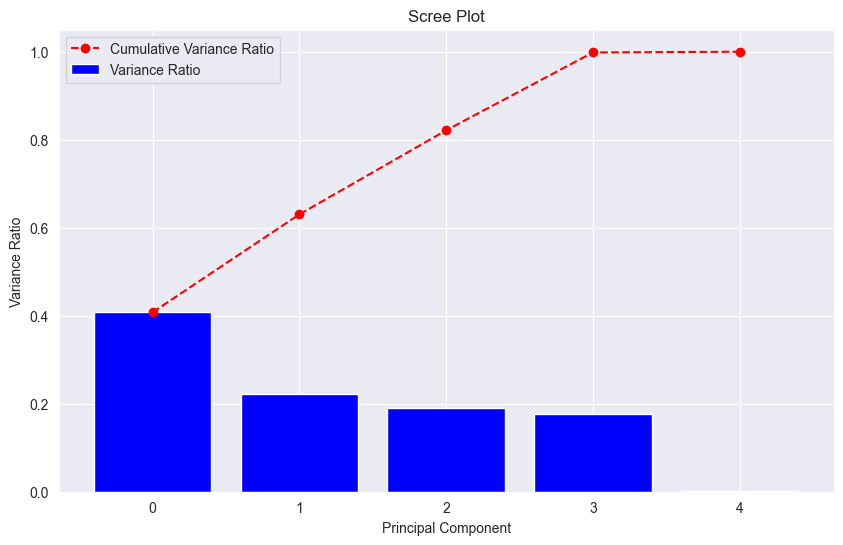

In [27]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)

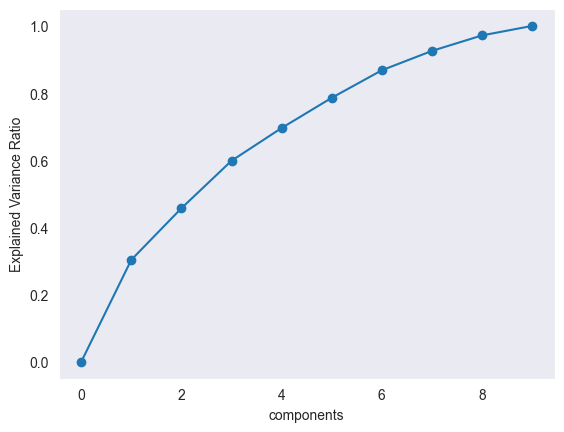

In [32]:
#using the survey data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df2.head()

#for sample purposes - choose any column
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
#remove missing values
df_likert = df_likert.dropna()
#standardize data
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)

#range is 0 to 5 not including 6 - exclusive
nums = range(0, 9+1)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

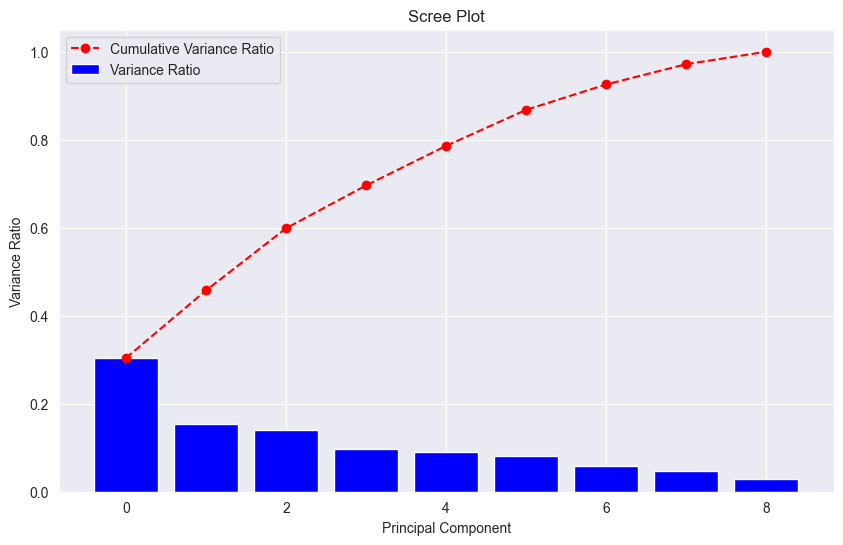

In [33]:
#analyze result
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)

In [34]:
#picdataset
#to show the use of PCA using a large dataset
x = fash.iloc[:, :784]

y = fash.iloc[:, -1]
#dataset representing an image where each pixel represent the matrix (10000rowsx785 columns)
#numbers 1 to 254 representing how dark is the color of the pixel
x = x[:10000]
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


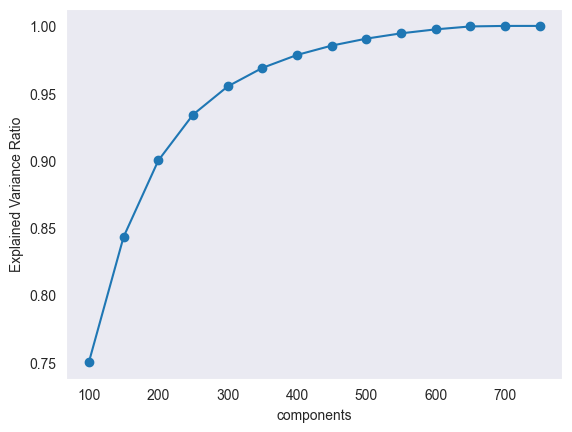

In [35]:
#large dataset using incremental PCA
#or regular PCA - for discussion purposes
#add data in batches to manage efficiently
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
scale_data = scaler.fit_transform(x)

#range of numbers starting from 100, ending at 784 (inclusive), with a step size of 50.
#sequence will start at 100, increment by 50 for each subsequent number, and stop before or at 785.
batch_size = None
nums = range(100, 784+1, 50)
var_ratio = []
for num in nums:
    ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
    ipca.fit(scale_data)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))

plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)